# Laboratorio de Cómputo de Soluciones Aproximadas de EDPs Elípticas por Sumas Parciales de Fourier

Con el procedimiento presentado en este cuaderno se resuelven problemas de la forma:
$$
u_{xx} + u_{yy}=f(x,y),\\
u(0,y)=u(L_x,y)=0,\\
u(x,0)=u(x,L_y) =0.
$$

Utilizando sumas parciales de Fourier correspondientes al operador:
$$
\mathcal{F}_{N_x,N_y}(u)(x,y):=\sum_{m=1}^{N_x}\sum_{n=1}^{N_y} A_{m,n}(u)\: \mathrm{sen}\left(\frac{m\pi x}{L_x}\right)\mathrm{sen}\left(\frac{n\pi y}{L_y}\right)
$$
donde
$$
A_n(u):=-\frac{4 L_x L_y}{ (\pi^2 L_x^2 n^2+\pi^2 L_y^2 m^2)}\int_{0}^{L_y}\int_{0}^{L_x} f(x,y)\: \mathrm{sen}\left(\frac{m\pi x}{L_x}\right) \: \mathrm{sen}\left(\frac{n\pi y}{L_y}\right) dx dy
$$
para cada $1\leq n\leq N_y$, $1\leq m\leq N_x$.

Las librerías de Python necesarias para estos cálculos son las siguientes:

In [ ]:
from scipy.integrate import quad, dblquad
from numpy import sin,cos, pi, zeros,linspace, arange, meshgrid, max, poly1d, polyder, array
from matplotlib.cm import Blues
from matplotlib.pyplot import style, subplots, show, xlabel, ylabel, plot
from numpy.linalg import lstsq
from scipy.interpolate import lagrange

## Ejemplo de cálculo de solución aproximada

Consideremos el problema de calcular la solución aproximada $\hat{u}_{10}(x,y):=\mathcal{F}_{10,10}(u)(x,y)$ para el problema:
$$
u_{xx} + u_{yy}=f(x,y),\\
u(0,y)=u(1,y)=0,\\
u(x,0)=u(x,1) =0.
$$
para
$$
f(x,y)=-25(1-|2x-1|)(1-|2y-1|).
$$

Es posible observar que para este problema $L_x=L_y=1$, y $N_x=N_y=10$.

In [ ]:
Nx = 10
Ny = 10
Lx = 1
Ly = 1

Ahora podemos definir $f(x,y)$:

In [ ]:
f = lambda x,y: -25*(1-abs(2*x-1))*(1-abs(2*y-1))

Calculamos ahora los coeficientes $A_{m,n}(u)$ para $1\leq m,n\leq 10$.

In [ ]:
A = zeros((Ny,Nx))
for m in range(Ny):
  for n in range(Nx):
    fs = lambda x,y: f(x,y)*sin((n+1)*pi*x/Lx)*sin((m+1)*pi*y/Ly)
    A[m,n] = 4*dblquad(fs,0,Lx,0,Ly)[0]/(Lx*Ly)

Definimos el oprador de representación aproximada de Fourier
$$
\mathcal{S}_{N,M}(f)(x,t):=\sum_{m=1}^M\sum_{n=1}^N A_{n,m}(f)\: \mathrm{sen}\left(\frac{ m\pi x}{L_x}\right)\mathrm{sen}\left(\frac{m\pi y}{L_y}\right)
$$
utilizando la siguiente secuencia de comandos.

In [ ]:
def S_NM(x,y,A,Nx,Ny,Lx,Ly):
  s = 0
  for m in range(Ny):
    for n in range(Nx):
      s = s + A[m,n]*sin((n+1)*pi*x/Lx)*sin((m+1)*pi*y/Ly)
  return s

El operador de sumas parciales de Fourier:
$$
\mathcal{F}_{N_x,M_y}(u)(x,y):=\sum_{m=1}^{N_x}\sum_{n=1}^{N_y} A_{m,n}(u)\: \mathrm{sen}\left(\frac{m\pi x}{L_x}\right)\mathrm{sen}\left(\frac{n\pi y}{L_y}\right)
$$
puede calcularse utilizando la siguiete secuencia de comandos:

In [ ]:
def S_u_NM(x,y,A,Nx,Ny,Lx,Ly):
  s = 0
  for m in range(Ny):
    for n in range(Nx):
      s = s + -((Lx*Ly)**2/((pi*Lx*(n+1))**2+(pi*Ly*(m+1))**2))*A[m,n]*sin((n+1)*pi*x/Lx)*sin((m+1)*pi*y/Ly)
  return s

Es posible estimar  $\hat{f}_{10}(x,y):=\mathcal{F}_{10,10}(f)(x,y)$ y la solucion aproximada $\hat{u}_{10}(x,y):=\mathcal{F}_{10,10}(u)(x,y)$ utilizando la siguiente secuencia de comandos:

In [ ]:
X = arange(0, 1, 1/100)
Y = arange(0, 1, 1/100)
X, Y = meshgrid(X, Y)
F = S_NM(X,Y,A,Nx,Ny,Lx,Ly)
Z = S_u_NM(X,Y,A,Nx,Ny,Lx,Ly)

Graficamos $\hat{f}_{10}(x,y):=\mathcal{F}_{10,10}(f)(x,y)$ en $[0,1]^2$.

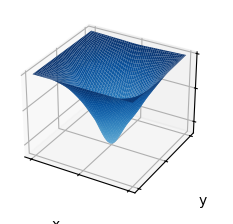

In [ ]:
style.use('_mpl-gallery')

fig, ax = subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, F, vmin=F.min() * 2, cmap=Blues)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

xlabel('x')
ylabel('y')

show()

In [ ]:
S_NM(1/2,1/2,A,Nx,Ny,Lx,Ly)

-23.02103367124855

Ahora graficamos $\hat{u}_{10}(x,y):=\mathcal{F}_{10,10}(u)(x,y)$ en $[0,1]^2$.

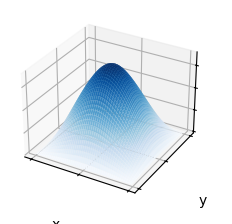

In [ ]:
style.use('_mpl-gallery')

fig, ax = subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, Z, vmin=Z.min() * 2, cmap=Blues)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

xlabel('x')
ylabel('y')

show()

In [ ]:
max(S_u_NM(X,Y,A,Nx,Ny,Lx,Ly))

0.8779712043894785

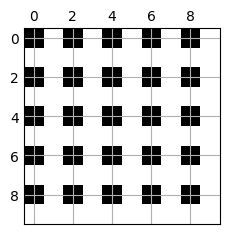

In [ ]:
from matplotlib.pyplot import spy,stem
spy(abs(A)>1e-14)

<StemContainer object of 3 artists>

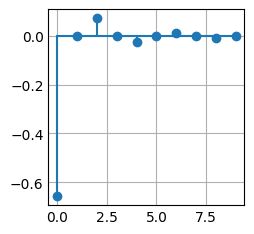

In [ ]:
stem(A[4,:])

# Soluciones Débiles y el Teorema de Lax-Milgram

Considerando la forma bilineal:
$$
a(u,v):=\int_\Omega \nabla u \cdot \nabla v \: dx
$$
y la forma lineal:
$$
\hat{f}(v):=\int_\Omega fv\: dx
$$
determinada por una $f$ dada, para $u,v\in H_0^1(\Omega)$. Para cada base finita $\{\phi_j\}_{j=1}^J\subset S_0^1(\Omega)$ de un subespacio $S_0^1(\Omega)\subset H_0^1(\Omega)$, es posible calcular una aproximación
$$
\hat{u}=\sum_{k=1}^J c_k \phi_k
$$
de la solución débil $u$ del problema:
$$
-\Delta u = f,
$$
determinada por la expresión
$$
a(u,v)=\hat{f}(v),
$$
al resolver el sistema de ecuaciones lineales:
$$
\sum_{k=1}^J a(\phi_j,\phi_k) c_k=\hat{f}(\phi_j), \:\: 1\leq j\leq J.
$$

### Ejemplo de calculo de solucion aproximada utilizando polinomios trigonometricos

In [ ]:
def a(j,k,Lx):
  If = lambda x: (j*k*(pi/Lx)**2)*cos(j*pi*x/Lx)*cos(k*pi*x/Lx)+sin(j*pi*x/Lx)*sin(k*pi*x/Lx)
  return quad(If,0,Lx)[0]
def b(j,Lx):
  If = lambda x: (4*x*(1-x)+8)*sin(j*pi*x/Lx)
  return quad(If,0,Lx)[0]

In [ ]:
N = 9*5
a0 = zeros((N,N))
b0 = zeros(N)
for j in range(N):
  for k in range(N):
    a0[j,k] = a(j+1,k+1,1)
    b0[j] = b(j+1,1)
c = lstsq(a0,b0,rcond=None)[0]

In [ ]:
def Sd(x,c,Lx):
  r = 0
  for j in range(len(c)):
    r = r + c[j]*sin((j+1)*pi*x/Lx)
  return r

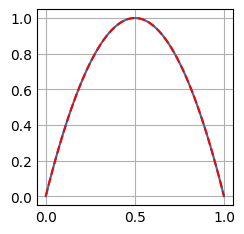

In [ ]:
x0 = linspace(0,1,100)
plot(x0,4*x0*(1-x0));plot(x0,Sd(x0,c,1),'r--');

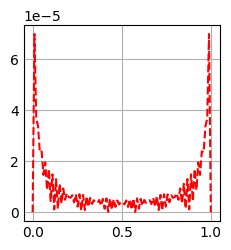

In [ ]:
plot(x0,abs(Sd(x0,c,1)-4*x0*(1-x0)),'r--');

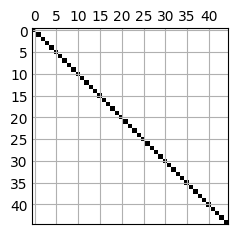

In [ ]:
a00=(abs(a0)>1e-10)*a0
spy(a00)

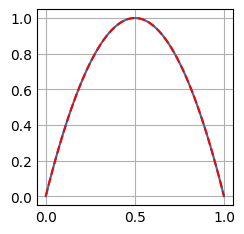

In [ ]:
c0 = lstsq(a00,b0,rcond=None)[0]
plot(x0,4*x0*(1-x0));plot(x0,Sd(x0,c0,1),'r--');

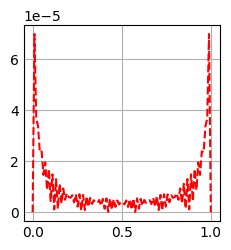

In [ ]:
plot(x0,abs(Sd(x0,c0,1)-4*x0*(1-x0)),'r--');

### Ejemplo de calculo de solucion aproximada utilizando polinomios de Lagrange

In [ ]:
N1 = 5
x1 = linspace(0,1,N1)
y1 = zeros(N1)
p = []
for j in range(N1-2):
  y1[j+1]=1
  p.append(lagrange(x1,y1))


In [ ]:
def a1(j,k,Lx,p):
  If = lambda x: polyder(p[j])(x)*polyder(p[k])(x)+p[j](x)*p[k](x)
  return quad(If,0,Lx)[0]
def b1(j,Lx,p):
  If = lambda x: (4*x*(1-x)+8)*p[j](x)
  return quad(If,0,Lx)[0]

In [ ]:
N1 = len(p)
a01 = zeros((N1,N1))
b01 = zeros(N1)
for j in range(N1):
  for k in range(N1):
    a01[j,k] = a1(j,k,1,p)
    b01[j] = b1(j,1,p)
c = lstsq(a01,b01,rcond=None)[0]
u = poly1d([0])
for j in range(N1):
  u = u + c[j]*p[j]

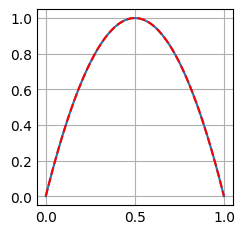

In [ ]:
plot(x0,4*x0*(1-x0));plot(x0,u(x0),'r--');

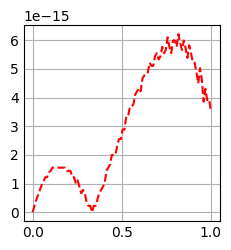

In [ ]:
plot(x0,abs((4*x0*(1-x0))-u(x0)),'r--');

In [ ]:
u

poly1d([-1.59872116e-14,  8.52651283e-14, -4.00000000e+00,  4.00000000e+00,
        0.00000000e+00])

In [ ]:
a01


array([[17.92451499,  2.82186949,  9.09770723],
       [ 2.82186949, 11.66843034,  2.84162257],
       [ 9.09770723,  2.84162257, 11.93932981]])

### Referencias

1. F. Vides (2021). Métodos Numéricos y Modelación Computacional (libro de lecturas).